### Import libraries

Import the following relevant Python libraries:
* `numpy`
* `pandas`
* `matplotlib.pyplot`
* `plotly.express`
* `seaborn`


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### Load the dataset

In [3]:
df=pd.read_csv(r"C:\Users\Asus\Documents\OneDrive\Desktop\Coursera\Labs of EDA All Modules C3\Labs of EDA Module 3\Unicorn_Companies.csv")
df

Company Valuation Date Joined                         Industry  \
0       Bytedance     $180B      4/7/17          Artificial intelligence   
1          SpaceX     $100B     12/1/12                            Other   
2           SHEIN     $100B      7/3/18  E-commerce & direct-to-consumer   
3          Stripe      $95B     1/23/14                          Fintech   
4          Klarna      $46B    12/12/11                          Fintech   
...           ...       ...         ...                              ...   
1069     Zhaogang       $1B     6/29/17  E-commerce & direct-to-consumer   
1070  Zhuan Zhuan       $1B     4/18/17  E-commerce & direct-to-consumer   
1071     Zihaiguo       $1B      5/6/21                Consumer & retail   
1072         Zopa       $1B    10/19/21                          Fintech   
1073        Zwift       $1B     9/16/20  E-commerce & direct-to-consumer   

               City  Country/Region      Continent  Year Founded Funding  \
0           Beijing           China           Asia          2012     $8B   
1         Hawthorne   United States  North America          2002     $7B   
2          Shenzhen           China           Asia          2008     $2B   
3     San Francisco   United States  North America          2010     $2B   
4         Stockholm          Sweden         Europe          2005     $4B   
...             ...             ...            ...           ...     ...   
1069       Shanghai           China           Asia          2012   $379M   
1070        Beijing           China           Asia          2015   $990M   
1071      Chongqing           China           Asia          2018    $80M   
1072         London  United Kingdom         Europe          2005   $792M   
1073     Long Beach   United States  North America          2014   $620M   

                                       Select Investors  
0     Sequoia Capital China, SIG Asia Investments, S...  
1     Founders Fund, Draper Fisher Jurvetson, Rothen...  
2     Tiger Global Management, Sequoia Capital China...  
3           Khosla Ventures, LowercaseCapital, capitalG  
4     Institutional Venture Partners, Sequoia Capita...  
...                                                 ...  
1069    K2 Ventures, Matrix Partners China, IDG Capital  
1070                           58.com, Tencent Holdings  
1071  Xingwang Investment Management, China Capital ...  
1072  IAG Capital Partners, Augmentum Fintech, North...  
1073    Novator Partners, True, Causeway Media Partners  

[1074 rows x 10 columns]

## Data exploration

### Display top rows

In [4]:
df.head(1)

Company Valuation Date Joined                 Industry     City  \
0  Bytedance     $180B      4/7/17  Artificial intelligence  Beijing   

  Country/Region Continent  Year Founded Funding  \
0          China      Asia          2012     $8B   

                                    Select Investors  
0  Sequoia Capital China, SIG Asia Investments, S...

### Statistical properties of the dataset

In [5]:
# Get the shape of the dataset
df.shape

(1074, 10)

In [6]:
# Get the data types and number of non-null values in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


- Except for the `Year Funded` column, which is `int64`, the data type for all other columns is `object`. 
-  Columns `City` and `Select Investors` contain less non-null values than the total number of rows in the dataset, which indicates that they are missing values. 

In [7]:
# Get descriptive statistics such as mean, standard deviation, and range of the numerical columns in the dataset.
df.describe()

Year Founded
count   1074.000000
mean    2012.895717
std        5.698573
min     1919.000000
25%     2011.000000
50%     2014.000000
75%     2016.000000
max     2021.000000

-  The oldest company in the list was founded in 1919. This is the minimum value in `Year Funded`. 

In [8]:
# Get descriptive statistics of Catogory Columns such as count, unique, and top, min , frequency of the catogorical  columns in the dataset.
df.describe(include='O')

Company Valuation Date Joined Industry           City Country/Region  \
count     1074      1074        1074     1074           1058           1074   
unique    1073        30         639       16            256             46   
top       Bolt       $1B     7/13/21  Fintech  San Francisco  United States   
freq         2       471           9      224            152            562   

            Continent Funding Select Investors  
count            1074    1074             1073  
unique              6     539             1058  
top     North America     $1B  Sequoia Capital  
freq              589      60                3

### Understanding categories

In [9]:
df['Industry'].value_counts()

Industry
Fintech                                224
Internet software & services           205
E-commerce & direct-to-consumer        111
Health                                  74
Artificial intelligence                 73
Other                                   58
Supply chain, logistics, & delivery     57
Cybersecurity                           50
Data management & analytics             41
Mobile & telecommunications             38
Hardware                                34
Auto & transportation                   31
Edtech                                  28
Consumer & retail                       25
Travel                                  14
Artificial Intelligence                 11
Name: count, dtype: int64

### Finding Missing Values

In [10]:
# Find the number of missing values in each column in this dataset.

df.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

- There is a single missing value in the Select Investors column and 16 missing cities. There are no missing values in other columns

## Data Preprocessing

### Converting the columns

In [11]:
df['Date Joined']=pd.to_datetime(df['Date Joined'],format='mixed', dayfirst=True, errors='coerce')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 84.0+ KB


In [13]:
df['Funding']

0         $8B
1         $7B
2         $2B
3         $2B
4         $4B
        ...  
1069    $379M
1070    $990M
1071     $80M
1072    $792M
1073    $620M
Name: Funding, Length: 1074, dtype: object

In [14]:
# Create a new column `Year Joined` 
df['Year Joined']=pd.to_datetime(df['Date Joined'],format='mixed', dayfirst=True, errors='coerce').dt.year
df.head(2)

Company Valuation Date Joined                 Industry       City  \
0  Bytedance     $180B  2017-07-04  Artificial intelligence    Beijing   
1     SpaceX     $100B  2012-01-12                    Other  Hawthorne   

  Country/Region      Continent  Year Founded Funding  \
0          China           Asia          2012     $8B   
1  United States  North America          2002     $7B   

                                    Select Investors  Year Joined  
0  Sequoia Capital China, SIG Asia Investments, S...         2017  
1  Founders Fund, Draper Fisher Jurvetson, Rothen...         2012

### Create a new column "Years To Unicorn"

Adding a column called `Years To Unicorn`, which is the number of years between when the company was founded and when it became a unicorn.

In [15]:
# Create the column Years To Unicorn.

df['Years To Unicorn']=df['Date Joined'].dt.year - df['Year Founded']
df.head()

Company Valuation Date Joined                         Industry  \
0  Bytedance     $180B  2017-07-04          Artificial intelligence   
1     SpaceX     $100B  2012-01-12                            Other   
2      SHEIN     $100B  2018-03-07  E-commerce & direct-to-consumer   
3     Stripe      $95B  2014-01-23                          Fintech   
4     Klarna      $46B  2011-12-12                          Fintech   

            City Country/Region      Continent  Year Founded Funding  \
0        Beijing          China           Asia          2012     $8B   
1      Hawthorne  United States  North America          2002     $7B   
2       Shenzhen          China           Asia          2008     $2B   
3  San Francisco  United States  North America          2010     $2B   
4      Stockholm         Sweden         Europe          2005     $4B   

                                    Select Investors  Year Joined  \
0  Sequoia Capital China, SIG Asia Investments, S...         2017   
1  Founders Fund, Draper Fisher Jurvetson, Rothen...         2012   
2  Tiger Global Management, Sequoia Capital China...         2018   
3        Khosla Ventures, LowercaseCapital, capitalG         2014   
4  Institutional Venture Partners, Sequoia Capita...         2011   

   Years To Unicorn  
0                 5  
1                10  
2                10  
3                 4  
4                 6

### Create a new column "Month Joined"

In [16]:
df.loc[:, "Month Joined"] = df["Date Joined"].dt.month_name()
df['Month Joined'].head(5)

0        July
1     January
2       March
3     January
4    December
Name: Month Joined, dtype: object

knowing  how quickly a company achieves unicorn status may reveal certain trends or insights, this information is used to find the future companies to invest in.

### Input validation

This dataset has some issues with bad data, duplicate rows

Identifying and correcting each of these issues.

In [17]:
# Identify and correct the issue with Years To Unicorn.

df['Years To Unicorn'].describe()

count    1074.000000
mean        7.000931
std         5.329672
min        -4.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        98.000000
Name: Years To Unicorn, dtype: float64

In [18]:
# Isolate any rows where `Years To Unicorn` is negative

df[df['Years To Unicorn'] < 0]

Company Valuation Date Joined                     Industry     City  \
714  Yidian Zixun       $1B  2017-10-17  Mobile & telecommunications  Beijing   

    Country/Region Continent  Year Founded Funding  \
714          China      Asia          2021   $151M   

                                   Select Investors  Year Joined  \
714  Phoenix New Media, Tianjin Haihe Industry Fund         2017   

     Years To Unicorn Month Joined  
714                -4      October

-  There is a single row that has a negative value in the Years To Unicorn column. The company represented in this row is InVision.
 

In [19]:
# Replace Yidian Zixun's `Year Founded` value with 2011
df.loc[df['Company']=='Yidian Zixun',['Year Founded']]=2011

In [20]:
# Verifing the change was made properly
df[df['Company']=='Yidian Zixun']

Company Valuation Date Joined                     Industry     City  \
714  Yidian Zixun       $1B  2017-10-17  Mobile & telecommunications  Beijing   

    Country/Region Continent  Year Founded Funding  \
714          China      Asia          2011   $151M   

                                   Select Investors  Year Joined  \
714  Phoenix New Media, Tianjin Haihe Industry Fund         2017   

     Years To Unicorn Month Joined  
714                -4      October

In [21]:
# Recalculate all values in the `Years To Unicorn` column
df['Years To Unicorn']=df['Date Joined'].dt.year-df['Year Founded']

# Verify that there are no more negative values in the column
df['Years To Unicorn'].describe()

count    1074.000000
mean        7.010242
std         5.319160
min         0.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        98.000000
Name: Years To Unicorn, dtype: float64

### Handling duplicate rows
The Handling duplicate rows  that no company should appear in the data more than once.

Verifing each company appears only once.

Begin by checking which, if any, companies are duplicated. Filter the data to return all occurrences of those duplicated companies.

In [22]:
# Isolate rows of all companies that have duplicates
df[df['Company'].duplicated(keep=False)]

Company Valuation Date Joined               Industry           City  \
40    Bolt      $11B  2018-05-29  Auto & transportation        Tallinn   
44    Bolt      $11B  2021-08-10                Fintech  San Francisco   

   Country/Region      Continent  Year Founded Funding  \
40        Estonia         Europe          2013     $1B   
44  United States  North America          2014     $1B   

                                     Select Investors  Year Joined  \
40             Didi Chuxing, Diamler, TMT Investments         2018   
44  Activant Capital, Tribe Capital, General Atlantic         2021   

    Years To Unicorn Month Joined  
40                 5          May  
44                 7       August

- The duplicated companies are not different companies with the same name. They are the same company represented twice with minor variation.

Keep the first occurrence of each duplicate company and drop the subsequent rows that are copies.

In [23]:
# Drop rows of duplicate companies after their first occurrence
df=df.drop_duplicates(subset='Company',keep='first')

In [24]:
# verifing the duplicated row is deleted or not
df["Company"].duplicated().any()

np.False_

In [25]:
# verifing the duplicated row is deleted or not
# df["Company"].value_counts()["Bolt"]

### Standardizing the columns

In [26]:
# Define the `str_to_num()` function

def str_to_num(x):
    x = x.strip('$BM')
    x = int(x)

    return x

In [27]:
# Apply the `str_to_num()` function to the `Valuation` column
# and assign the result back to a new column called `valuation_num`

df['valuation_num'] = df['Valuation'].apply(str_to_num)
df[['Valuation', 'valuation_num']].head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_5448\4178078693.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['valuation_num'] = df['Valuation'].apply(str_to_num)


Valuation  valuation_num
0     $180B            180
1     $100B            100
2     $100B            100
3      $95B             95
4      $46B             46

### Handling Outliers

In [28]:
# Choose a numeric column
column = 'valuation_num'

# Compute Q1, Q3, and IQR
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]

print("Outliers detected:")
print(outliers)

Outliers detected:
                 Company Valuation Date Joined  \
0              Bytedance     $180B  2017-07-04   
1                 SpaceX     $100B  2012-01-12   
2                  SHEIN     $100B  2018-03-07   
3                 Stripe      $95B  2014-01-23   
4                 Klarna      $46B  2011-12-12   
..                   ...       ...         ...   
97             1Password       $7B  2021-08-07   
98   Automation Anywhere       $7B  2018-02-07   
99                Gemini       $7B  2021-11-19   
100            ConsenSys       $7B  2021-11-17   
101                   Ro       $7B  2020-07-27   

                            Industry           City Country/Region  \
0            Artificial intelligence        Beijing          China   
1                              Other      Hawthorne  United States   
2    E-commerce & direct-to-consumer       Shenzhen          China   
3                            Fintech  San Francisco  United States   
4                            F

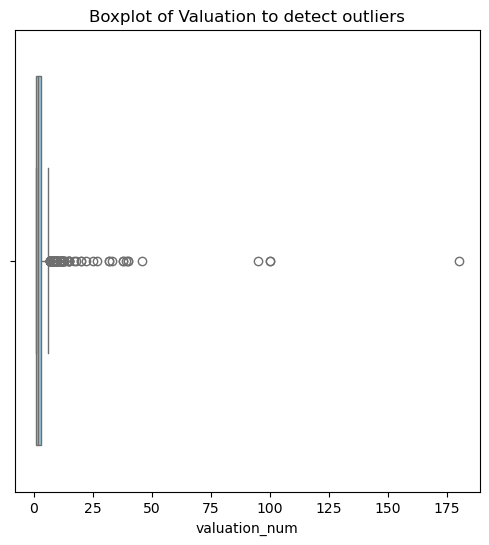

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numeric column you want to analyze
column = 'valuation_num'

# Boxplot to visualize outliers
plt.figure(figsize=(6,6))
sns.boxplot(x=df[column], color='skyblue')
plt.title(f'Boxplot of Valuation to detect outliers')
plt.xlabel(column)
plt.show()


In [30]:
df.columns.tolist()

['Company',
 'Valuation',
 'Date Joined',
 'Industry',
 'City',
 'Country/Region',
 'Continent',
 'Year Founded',
 'Funding',
 'Select Investors',
 'Year Joined',
 'Years To Unicorn',
 'Month Joined',
 'valuation_num']

In [31]:

# Column to analyze
column = 'Years To Unicorn'

# ----  Detect Outliers using IQR ----
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

# Outlier condition
outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]

print(f"Outliers in '{column}':")
print(outliers[['Company', column]])


Outliers in 'Years To Unicorn':
                               Company  Years To Unicorn
11                          Epic Games                27
37                            GoodLeap                18
42                       Weilong Foods                22
43                       Global Switch                18
49                          OutSystems                17
79                 Caris Life Sciences                25
84    National Stock Exchange of India                22
103                           Easyhome                19
117                    RELEX Solutions                17
118                         Vice Media                17
129              Howden Group Holdings                26
162                          Pine Labs                22
189               Otto Bock HealthCare                98
194                         Relativity                20
211              Intarcia Therapeutics                19
215                             SSENSE                18

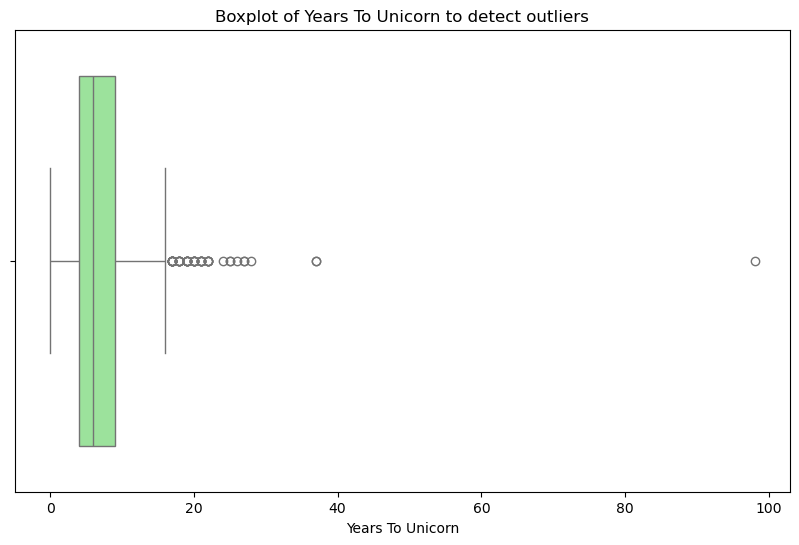

In [32]:
# ----  Boxplot to visualize outliers ----
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Years To Unicorn'], color='lightgreen')
plt.title(f'Boxplot of Years To Unicorn to detect outliers')
plt.xlabel('Years To Unicorn')
plt.show()

## Sort the data

In [33]:
# Sort `companies` and display the first 10 rows of the resulting DataFrame.

# To arrange the data from latest to earliest `Year Founded`
df.sort_values(by="Year Founded", ascending=False).head(10)


Company Valuation Date Joined                         Industry  \
775            Jokr       $1B  2021-02-12  E-commerce & direct-to-consumer   
782         Phantom       $1B  2022-01-31                          Fintech   
554      ClickHouse       $2B  2021-10-28      Data management & analytics   
967    Mensa Brands       $1B  2021-11-16                            Other   
396       candy.com       $2B  2021-10-21                          Fintech   
864           Aptos       $1B  2022-03-15     Internet software & services   
822      GlobalBees       $1B  2021-12-28  E-commerce & direct-to-consumer   
238       Yuga Labs       $4B  2022-03-22                          Fintech   
952  LayerZero Labs       $1B  2022-03-30     Internet software & services   
314      Flink Food       $3B  2021-01-12  E-commerce & direct-to-consumer   

               City Country/Region      Continent  Year Founded Funding  \
775        New York  United States  North America          2021   $430M   
782   San Francisco  United States  North America          2021   $118M   
554  Portola Valley  United States  North America          2021   $300M   
967       Bengaluru          India           Asia          2021   $218M   
396        New York  United States  North America          2021   $100M   
864       Palo Alto  United States  North America          2021   $200M   
822       New Delhi          India           Asia          2021   $185M   
238           Miami  United States  North America          2021   $450M   
952        New York  United States  North America          2021   $143M   
314          Berlin        Germany         Europe          2021     $1B   

                                      Select Investors  Year Joined  \
775    GGV Capital, Tiger Global Management, Greycroft         2021   
782        Paradigm, Andreessen Horowitz, Jump Capital         2022   
554  Lightspeed Venture Partners, Almaz Capital Par...         2021   
967  Accel, Falcon Edge Capital, Norwest Venture Pa...         2021   
396  Insight Partners, Softbank Group, Connect Vent...         2021   
864  Andreessen Horowitz, Coinbase Ventures, Tiger ...         2022   
822  Chiratae Ventures, SoftBank Group, Trifecta Ca...         2021   
238  Andreessen Horowitz, Thrive Capital, Sound Ven...         2022   
952  Andreessen Horowitz, FTX Ventures, Tiger Globa...         2022   
314            Mubadala Capital, Bond, Prosus Ventures         2021   

     Years To Unicorn Month Joined  valuation_num  
775                 0     February              1  
782                 1      January              1  
554                 0      October              2  
967                 0     November              1  
396                 0      October              2  
864                 1        March              1  
822                 0     December              1  
238                 1        March              4  
952                 1        March              1  
314                 0      January              3

**Question:** What do you observe from the sorting that you performed?

- If you sorted by `Year Founded` in descending order and displayed the first 10 rows of the resulting DataFrame, you might observe the following:
  - These 10 rows correspond to unicorn companies that were founded in 2021. 
  - These 10 companies were founded in different parts of the world and belong to different industries. 
  - Many of these 10 companies were founded in the United States and belong to "Fintech," "E-commerce & direct-to-consumer," and "Internet software & services" industries. 

## Reviewing Missing Values

In [34]:
df.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
Year Joined          0
Years To Unicorn     0
Month Joined         0
valuation_num        0
dtype: int64

**Question: Is there a specific country/region that shows up a lot in this missing values dataframe? Which one?**
- Twelve of the 17 rows with missing values are for companies from Singapore.

In [35]:
mask=df['City'].isnull()
df_missing_rows=df[mask]
df_missing_rows

Company Valuation Date Joined  \
12                           FTX      $32B  2021-07-20   
170                    HyalRoute       $4B  2020-05-26   
242                       Moglix       $3B  2021-05-17   
251                         Trax       $3B  2019-07-22   
325                  Amber Group       $3B  2021-06-21   
382                    Ninja Van       $2B  2021-09-27   
541   Advance Intelligence Group       $2B  2021-09-23   
811                    Carousell       $1B  2021-09-15   
848                   Matrixport       $1B  2021-01-06   
880                     bolttech       $1B  2021-01-07   
889                        Carro       $1B  2021-06-14   
893                        Cider       $1B  2021-02-09   
980                         NIUM       $1B  2021-07-13   
986                          ONE       $1B  2021-08-12   
994                      PatSnap       $1B  2021-03-16   
1061                       WeLab       $1B  2017-08-11   

                                 Industry City Country/Region      Continent  \
12                                Fintech  NaN        Bahamas  North America   
170           Mobile & telecommunications  NaN      Singapore           Asia   
242       E-commerce & direct-to-consumer  NaN      Singapore           Asia   
251               Artificial intelligence  NaN      Singapore           Asia   
325                               Fintech  NaN      Hong Kong           Asia   
382   Supply chain, logistics, & delivery  NaN      Singapore           Asia   
541               Artificial intelligence  NaN      Singapore           Asia   
811       E-commerce & direct-to-consumer  NaN      Singapore           Asia   
848                               Fintech  NaN      Singapore           Asia   
880                               Fintech  NaN      Singapore           Asia   
889       E-commerce & direct-to-consumer  NaN      Singapore           Asia   
893       E-commerce & direct-to-consumer  NaN      Hong Kong           Asia   
980                               Fintech  NaN      Singapore           Asia   
986          Internet software & services  NaN      Singapore           Asia   
994          Internet software & services  NaN      Singapore           Asia   
1061                              Fintech  NaN      Hong Kong           Asia   

      Year Founded Funding                                   Select Investors  \
12            2018     $2B             Sequoia Capital, Thoma Bravo, Softbank   
170           2015   $263M                                          Kuang-Chi   
242           2015   $471M            Jungle Ventures, Accel, Venture Highway   
251           2010     $1B  Hopu Investment Management, Boyu Capital, DC T...   
325           2015   $328M  Tiger Global Management, Tiger Brokers, DCM Ve...   
382           2014   $975M  B Capital Group, Monk's Hill Ventures, Dynamic...   
541           2016   $536M        Vision Plus Capital, GSR Ventures, ZhenFund   
811           2012   $288M  500 Global, Rakuten Ventures, Golden Gate Vent...   
848           2019   $100M  Dragonfly Captial, Qiming Venture Partners, DS...   
880           2018   $210M  Mundi Ventures, Doqling Capital Partners, Acti...   
889           2015   $595M  SingTel Innov8, Alpha JWC Ventures, Golden Gat...   
893           2020   $140M       Andreessen Horowitz, DST Global, IDG Capital   
980           2014   $285M  Vertex Ventures SE Asia, Global Founders Capit...   
986           2011   $515M  Temasek, Guggenheim Investments, Qatar Investm...   
994           2007   $352M  Sequoia Capital China, Shunwei Capital Partner...   
1061          2013   $871M  Sequoia Capital China, ING, Alibaba Entreprene...   

      Year Joined  Years To Unicorn Month Joined  valuation_num  
12           2021                 3         July             32  
170          2020                 5          May              4  
242          2021                 6          May              3  
251          2019                 9

In [36]:
# mask=df['City'].isna()
# df[mask]

## Dropping the missing values

In [37]:
# Store the total number of values in a variable called `count_total`

count_total = df.size
count_total

15022

In [38]:
# Drop the rows containing missing values, determine number of remaining values 

count_dropna_rows = df.dropna().size
count_dropna_rows

14784

In [39]:
# Drop the columns containing missing values, determine number of remaining values

count_dropna_columns = df.dropna(axis=1).size
count_dropna_columns

12876

In [40]:
# Print the percentage of values removed by dropping rows.

row_percent = ((count_total - count_dropna_rows) / count_total) * 100
print(f'Percentage removed, rows: {row_percent:.3f}')

# Print the percentage of values removed by dropping columns.

col_percent = ((count_total - count_dropna_columns) / count_total) * 100
print(f'Percentage removed, columns: {col_percent:.3f}')

Percentage removed, rows: 1.584
Percentage removed, columns: 14.286


### Determine the number of companies founded each year

In [41]:
# Display each unique year that occurs in the dataset
# along with the number of companies that were founded in each unique year.

df["Year Founded"].value_counts().sort_values(ascending=False)


Year Founded
2015    155
2016    110
2014    108
2012     95
2013     87
2011     83
2017     74
2018     61
2019     45
2010     40
2009     34
2008     27
2020     25
2007     24
2006     15
2005     14
2000     11
2021     10
2001      9
2003      8
2004      8
1999      8
1998      5
2002      4
1995      2
1994      2
1991      1
1919      1
1996      1
1979      1
1992      1
1984      1
1990      1
1993      1
1997      1
Name: count, dtype: int64

In [42]:
df["Years To Unicorn"].value_counts().sort_values(ascending=False)


Years To Unicorn
6     139
5     129
4     125
7     106
3      98
8      88
2      68
10     62
9      52
11     36
1      36
14     20
13     19
12     17
16     10
17     10
0       9
15      9
19      7
21      6
18      6
20      6
22      5
27      2
25      2
37      2
98      1
26      1
24      1
28      1
Name: count, dtype: int64

## Univariate Analysis

##  Annual Unicorn Creation 

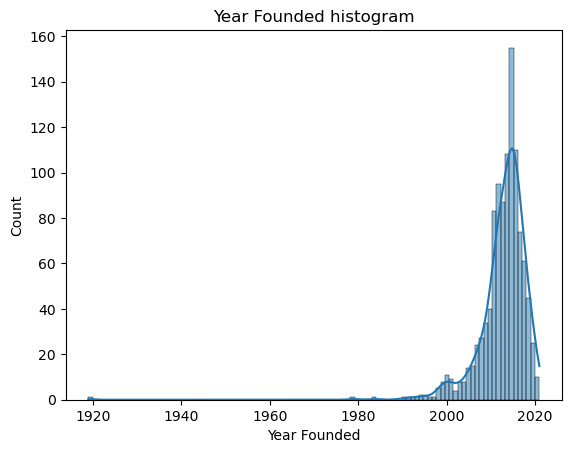

In [43]:
sns.histplot(data=df, x='Year Founded', kde=True)
plt.title('Year Founded histogram');

### Unicorn Growth within Time Frame

In [44]:
df.loc[:,'Time_Frame'] = pd.cut(df['Years To Unicorn'],
                          bins=[0,2,5,10,50],
                          labels=['0-2 Years','3-5 Years','6-10 Years','>10 Years'])

time_counts = df['Time_Frame'].value_counts().sort_index()
time_counts


C:\Users\Asus\AppData\Local\Temp\ipykernel_5448\1031799914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Time_Frame'] = pd.cut(df['Years To Unicorn'],


Time_Frame
0-2 Years     104
3-5 Years     352
6-10 Years    447
>10 Years     160
Name: count, dtype: int64

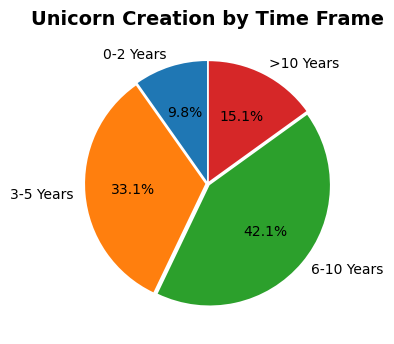

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.pie(
    time_counts,
    labels=time_counts.index,
    autopct='%1.1f%%',
    startangle=90,      # ⭐ Adds the shadow you want
    explode=[0.02]*len(time_counts)  # Slight pop-out for depth (optional)
)
plt.title('Unicorn Creation by Time Frame', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## Catogorical - Numerical


### Visualize the time it took companies to become unicorns with respect to months
- Does the time of year influence speed to unicorn valuation? (Seasonality trends)
- When do startups peak?

In [46]:
# Define a list that contains months in chronological order.

month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", 
               "December"]

# Print out the list to confirm it is correct.
print(month_order)
            

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


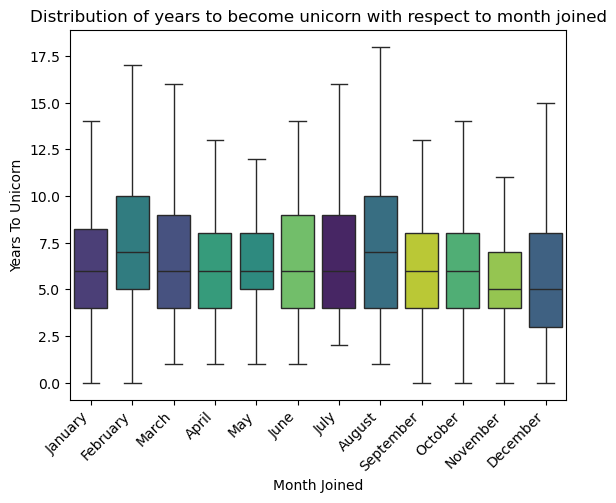

In [47]:
# Create the box plot to visualize the distribution of how long it took companies to become unicorns, with respect to the month they joined.
# Make sure the x-axis goes in chronological order by month, using the list you defined previously.
# Plot the data from the `companies` DataFrame.

sns.boxplot(x=df['Month Joined'], 
            y=df['Years To Unicorn'], 
            order=month_order, 
            showfliers=False,
           palette="viridis",
           hue=df['Month Joined'])

# Set the title of the plot.
plt.title('Distribution of years to become unicorn with respect to month joined')

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text.
plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot.
plt.show()


## Numerical - Numerical

### Visualize the time it took companies to reach unicorn status

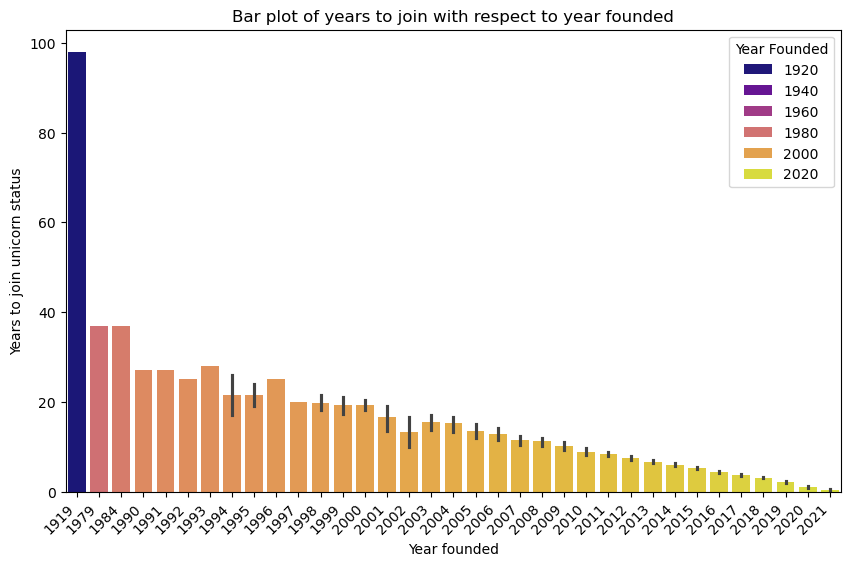

In [69]:
# Set the size of the plot.
plt.figure(figsize=(10,6))


# Create bar plot to visualize the average number of years it took companies to reach unicorn status ,with respect to when they were founded
sns.barplot(x=df["Year Founded"], y=df["Years To Unicorn"], palette="plasma" ,hue=df["Year Founded"])


# Set title
plt.title("Bar plot of years to join with respect to year founded")


# Set x-axis label
plt.xlabel("Year founded")


# Set y-axis label
plt.ylabel("Years to join unicorn status")


# Rotate the labels on the x-axis as a way to avoid overlap in the positions of the text.  
plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot.
plt.show()

#### The time taken to the companies , which are joined after 2000 has became unicorns quickly as copmarative to the companies which are joined in before 2000

## Catogorical - Numerical

### List of countries by sum of valuation

In [49]:
# Group the data by`Country/Region`

national_valuations = df.groupby(['Country/Region'])['valuation_num'].sum().sort_values(ascending=False).reset_index()

# Print the top 15 values of the DataFrame.
national_valuations.head(15)


Country/Region  valuation_num
0    United States           1922
1            China            696
2            India            196
3   United Kingdom            195
4          Germany             72
5           Sweden             63
6        Australia             56
7           France             55
8           Canada             49
9      South Korea             41
10          Israel             39
11          Brazil             37
12         Bahamas             32
13       Indonesia             28
14       Singapore             21

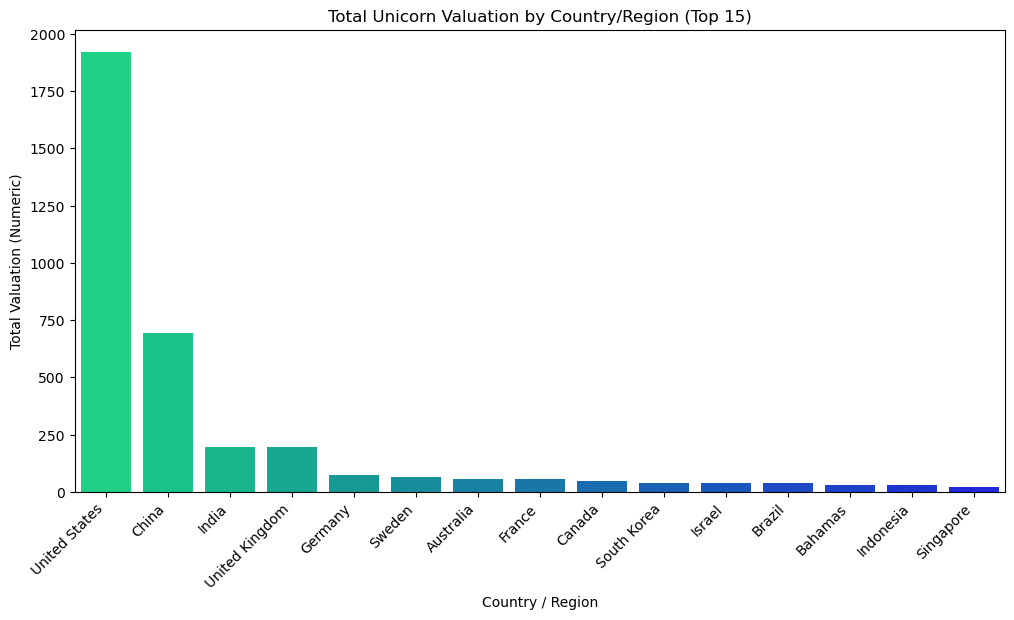

In [50]:
# Take the top 15 for visualization
top15 = national_valuations.head(15)

plt.figure(figsize=(12,6))
sns.barplot(
    data=top15,
    x='Country/Region',
    y='valuation_num',
    hue='Country/Region',   
    palette='winter_r',
    legend=False
)

plt.title("Total Unicorn Valuation by Country/Region (Top 15)")
plt.xlabel("Country / Region")
plt.ylabel("Total Valuation (Numeric)")
plt.xticks(rotation=45, ha='right')

plt.show()

## Catogorical - Numerical

### Filter out top 4 outlying countries

In [51]:
# Remove outlying countries

national_valuations_no_big4 = national_valuations.iloc[4:, :]

national_valuations_no_big4.head()

Country/Region  valuation_num
4        Germany             72
5         Sweden             63
6      Australia             56
7         France             55
8         Canada             49

### Create barplot for top 20 non-big-4 countries

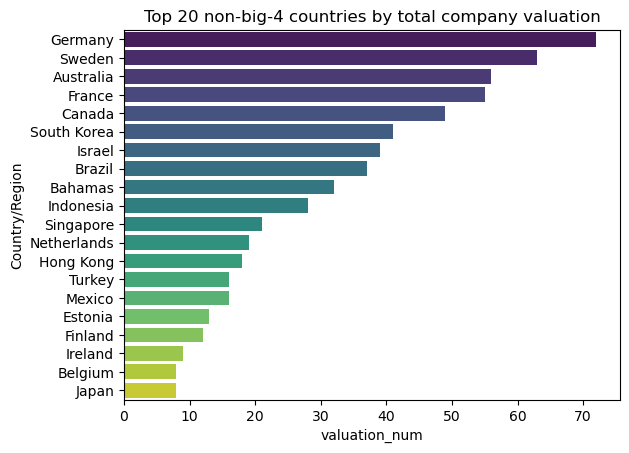

In [52]:
# Create a barplot to compare the top 20 non-big-4 countries with highest company valuations
sns.barplot(data=national_valuations_no_big4.head(20),
            y='Country/Region',
            x='valuation_num',
            hue='Country/Region',
            palette='viridis')
plt.title('Top 20 non-big-4 countries by total company valuation')
plt.show();

### Visualize the maximum unicorn company valuation per industry

In [53]:
# Prepare data for modeling
grouped = (df[["Industry", "valuation_num"]]
           .groupby("Industry")
           .max()
           .sort_values(by="valuation_num")
          )
grouped

valuation_num
Industry                                          
Artificial Intelligence                          3
Cybersecurity                                    9
Mobile & telecommunications                      9
Travel                                          10
Auto & transportation                           11
Hardware                                        12
Health                                          13
Edtech                                          22
Consumer & retail                               38
Data management & analytics                     38
Supply chain, logistics, & delivery             39
Internet software & services                    40
Fintech                                         95
E-commerce & direct-to-consumer                100
Other                                          100
Artificial intelligence                        180

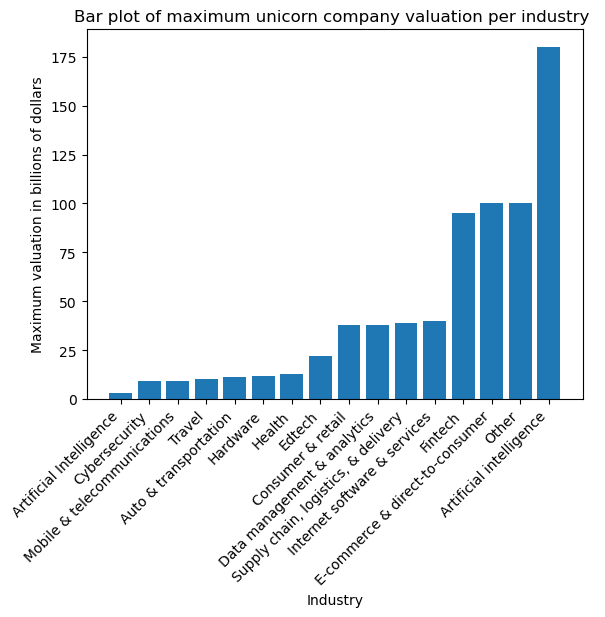

In [54]:
# Create bar plot
# with Industry column as the categories of the bars
# and new valuation column as the heights of the bars

plt.bar(grouped.index, grouped["valuation_num"])

# Set title
plt.title("Bar plot of maximum unicorn company valuation per industry ")

# Set x-axis label
plt.xlabel("Industry")

# Set y-axis label
plt.ylabel("Maximum valuation in billions of dollars")

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text  

plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot
plt.show()

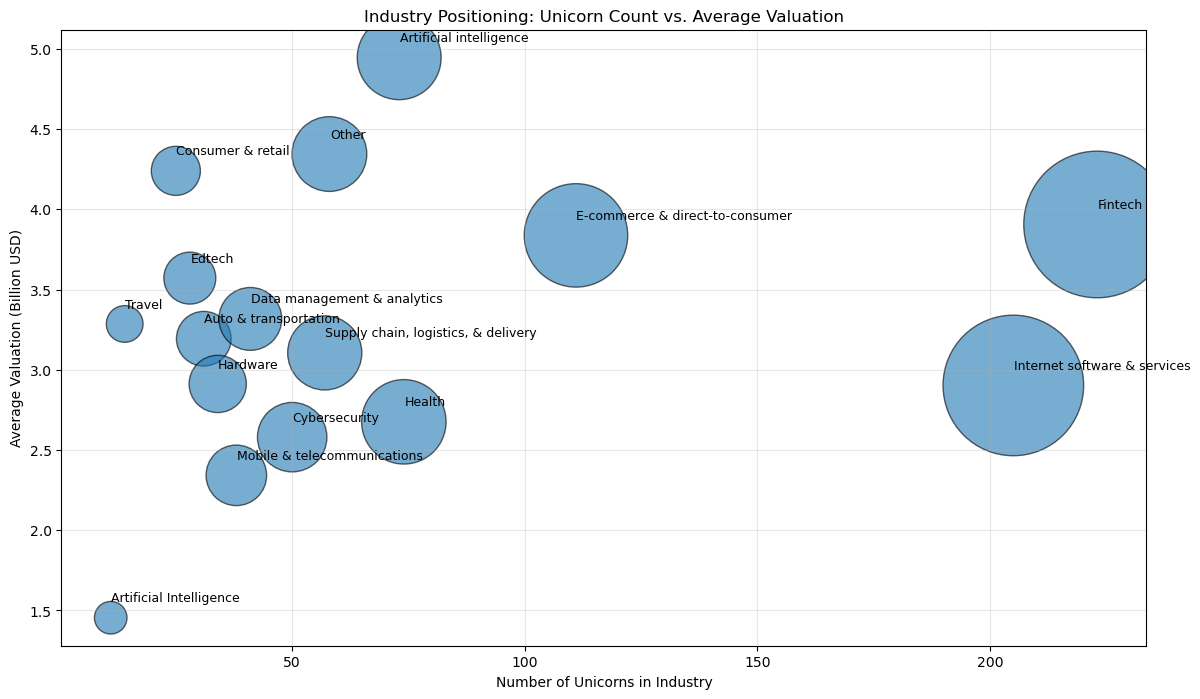

In [55]:
import matplotlib.pyplot as plt

# ---- Grouping the dataset ----
# Calculate average valuation per industry
industry_avg = df.groupby("Industry")["valuation_num"].mean()

# Count number of unicorns per industry
industry_count = df.groupby("Industry")["Company"].count()

# Create dataframe for plotting
bubble_df = pd.DataFrame({
    "Average Valuation": industry_avg,
    "Unicorn Count": industry_count
})

# ---- Plotting the bubble chart ----
plt.figure(figsize=(14, 8))

# Bubble scatter
plt.scatter(
    bubble_df["Unicorn Count"],
    bubble_df["Average Valuation"],
    s=bubble_df["Unicorn Count"] * 50,  # bubble size scaled
    alpha=0.6,
    edgecolor='black'
)
# Adding labels for each bubble
for industry, row in bubble_df.iterrows():
    plt.text(row["Unicorn Count"] + 0.1,
             row["Average Valuation"] + 0.1,
             industry,
             fontsize=9)

# Axis labels & title
plt.xlabel("Number of Unicorns in Industry")
plt.ylabel("Average Valuation (Billion USD)")
plt.title("Industry Positioning: Unicorn Count vs. Average Valuation")

# Grid for better readability
plt.grid(alpha=0.3)

plt.show()


## Industry Vs Country/Region

In [56]:
df.columns.tolist()

['Company',
 'Valuation',
 'Date Joined',
 'Industry',
 'City',
 'Country/Region',
 'Continent',
 'Year Founded',
 'Funding',
 'Select Investors',
 'Year Joined',
 'Years To Unicorn',
 'Month Joined',
 'valuation_num',
 'Time_Frame']

## Multivariate

### Correlation between NUmeric Columns

In [57]:
numeric_cols = ['valuation_num', 'Year Founded', 'Year Joined', 'Years To Unicorn']

corr_matrix = df[numeric_cols].corr()
corr_matrix


valuation_num  Year Founded  Year Joined  Years To Unicorn
valuation_num          1.000000     -0.074181    -0.220546         -0.003567
Year Founded          -0.074181      1.000000     0.356603         -0.936204
Year Joined           -0.220546      0.356603     1.000000         -0.005503
Years To Unicorn      -0.003567     -0.936204    -0.005503          1.000000

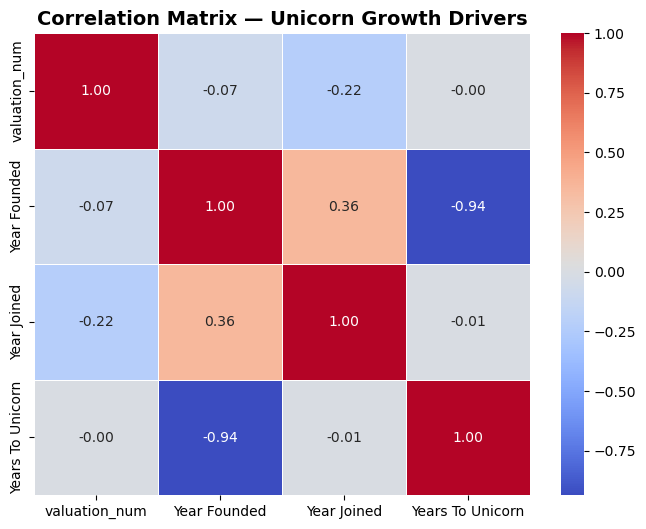

In [58]:
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    cmap='coolwarm'
)
plt.title('Correlation Matrix — Unicorn Growth Drivers', fontsize=14, fontweight='bold')
plt.show()


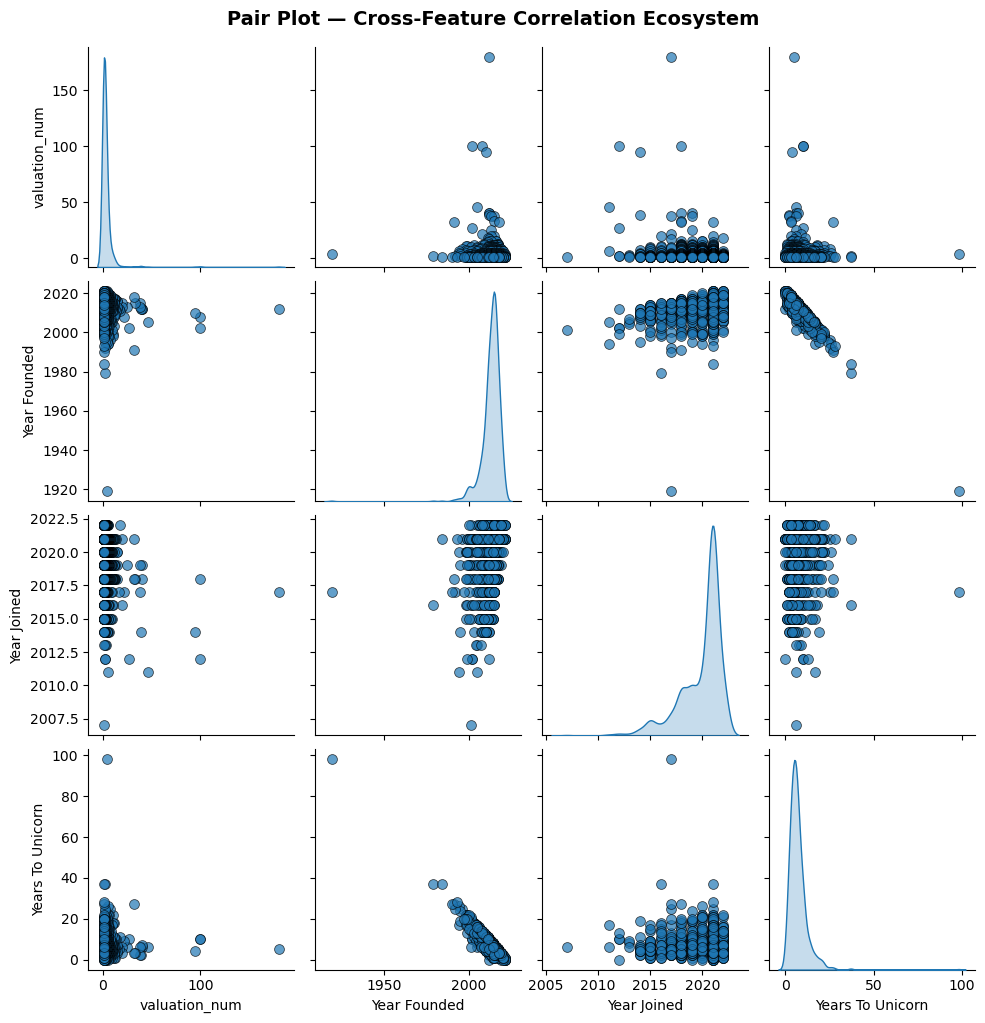

In [68]:
numeric_cols = ['valuation_num', 'Year Founded', 'Year Joined', 'Years To Unicorn']

# High-impact pairwise visualization strategy
sns.pairplot(
    df[numeric_cols],
    diag_kind='kde',
    plot_kws={'alpha': 0.7, 'edgecolor': 'k', 's': 50}
)

plt.suptitle(
    'Pair Plot — Cross-Feature Correlation Ecosystem',
    fontsize=14,
    fontweight='bold',
    y=1.02
)

plt.show()


## Numerical - Numerical

### Gain more insight on a specific year

To get more insight on the year of that interests you, filter the dataset by that year and save the resulting subset into a new variable. 

In [59]:
# Filter dataset by a year of your interest (in terms of when companies reached unicorn status).
# Save the resulting subset in a new variable .

companies_2021 = df[df["Date Joined"].dt.year == 2021]


# Display the first few rows of the subset to confirm that it was created

companies_2021.head()

Company Valuation Date Joined                             Industry  \
12             FTX      $32B  2021-07-20                              Fintech   
16     J&T Express      $20B  2021-07-04  Supply chain, logistics, & delivery   
24  Blockchain.com      $14B  2021-02-17                              Fintech   
27         OpenSea      $13B  2021-07-20      E-commerce & direct-to-consumer   
34           Getir      $12B  2021-03-26      E-commerce & direct-to-consumer   

        City  Country/Region      Continent  Year Founded Funding  \
12       NaN         Bahamas  North America          2018     $2B   
16   Jakarta       Indonesia           Asia          2015     $5B   
24    London  United Kingdom         Europe          2011   $490M   
27  New York   United States  North America          2017   $427M   
34  Istanbul          Turkey         Europe          2015     $2B   

                                     Select Investors  Year Joined  \
12             Sequoia Capital, Thoma Bravo, Softbank         2021   
16  Hillhouse Capital Management, Boyu Capital, Se...         2021   
24  Lightspeed Venture Partners, Google Ventures, ...         2021   
27  Andreessen Horowitz, Thirty Five Ventures, Sou...         2021   
34  Tiger Global Management, Sequoia Capital, Revo...         2021   

    Years To Unicorn Month Joined  valuation_num  Time_Frame  
12                 3         July             32   3-5 Years  
16                 6         July             20  6-10 Years  
24                10     February             14  6-10 Years  
27                 4         July             13   3-5 Years  
34                 6        March             12  6-10 Years

**Question:** Using a time interval, how could you observe trends in the companies that became unicorns in one year?

- First, identify a time interval of your choice. Then, take the subset that consists of the data for the year of interest, create a column that contains the time interval that each data point belongs to (as needed), group by that column, and count the number of companies that joined per interval. 
  - For example, if a subset consisted of companies that joined in 2021, create a column that corresponds to week joined, group by week, and count the number of companies that joined per week. This allows the observation of trends over the weeks of 2021. 

### Observe trends over time

Implement the structuring approach that you have identified to observe trends over time in the companies that became unicorns for the year that interests you.

In [60]:
# After identifying the time interval that interests you, proceed with the following:
# Step 1. Take the subset that you defined for the year of interest. 
#         Insert a column that contains the time interval that each data point belongs to, as needed.
# Step 2. Group by the time interval.
#         Aggregate by counting companies that joined per interval of that year.
#         Save the resulting DataFrame in a new variable.
# Insert a `Week Joined` column into `companies_2021.`
companies_2021.insert(3, "Week Joined", companies_2021["Date Joined"].dt.strftime('%Y-W%V'), True)

# Group `companies_2021` by `Week Joined`. 
# Aggregate by counting companies that joined per week of 2021.
# Save the resulting DataFrame in a new variable.
companies_by_week_2021 = companies_2021.groupby(by="Week Joined")["Company"].count().reset_index().rename(columns={"Company":"Company Count"})

# Display the first few rows of the new DataFrame to confirm that it was created.

companies_by_week_2021.head()

Week Joined  Company Count
0    2021-W01             10
1    2021-W02             12
2    2021-W03              5
3    2021-W04              8
4    2021-W05              4

### Visualize the number of companies that joined per interval 

Using the subset of companies joined in the year of interest, grouped by the time interval of your choice, create a bar plot to visualize the number of companies that joined per interval for that year.

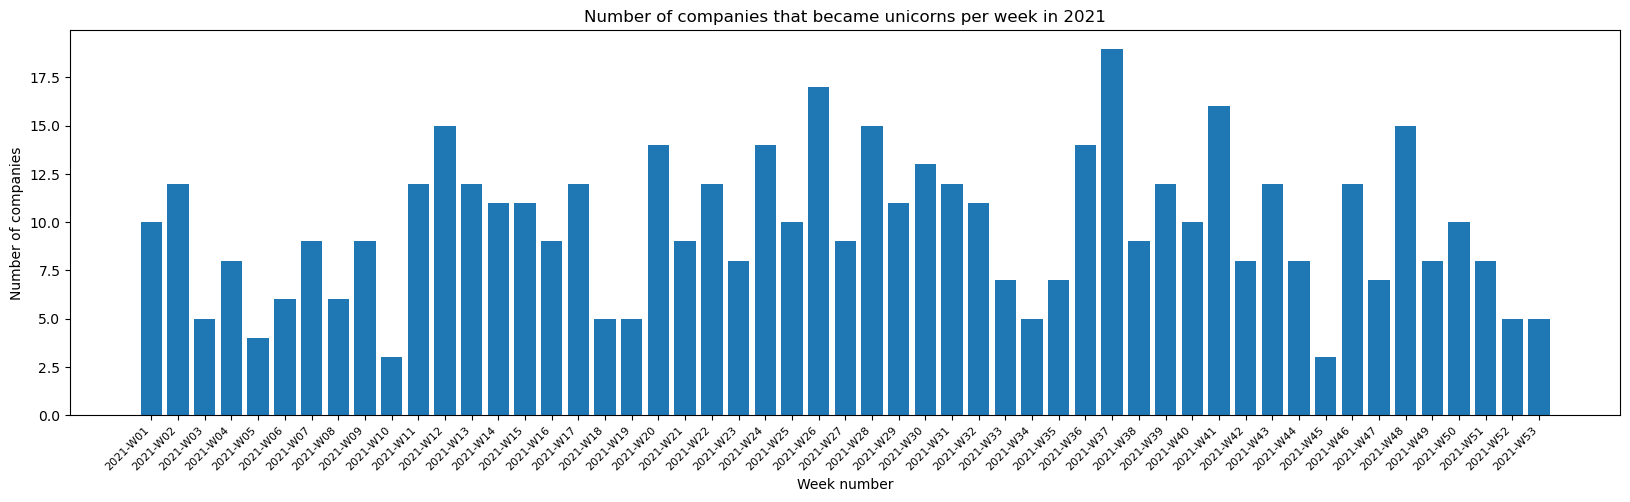

In [61]:
# Set the size of the plot.
plt.figure(figsize = (20, 5))

# Create bar plot to visualize number of companies that joined per interval for the year of interest.
plt.bar(x=companies_by_week_2021['Week Joined'],height=companies_by_week_2021['Company Count'])
plt.plot()

# Set the x-axis label.
plt.xlabel("Week number")

# Set the y-axis label.
plt.ylabel("Number of companies")

# Set the title.
plt.title("Number of companies that became unicorns per week in 2021")

# Rotate the labels on the x-axis as a way to avoid overlap in the positions of the text.  
plt.xticks(rotation = 45, horizontalalignment='right', fontsize=8)

# Display the plot.
plt.show()

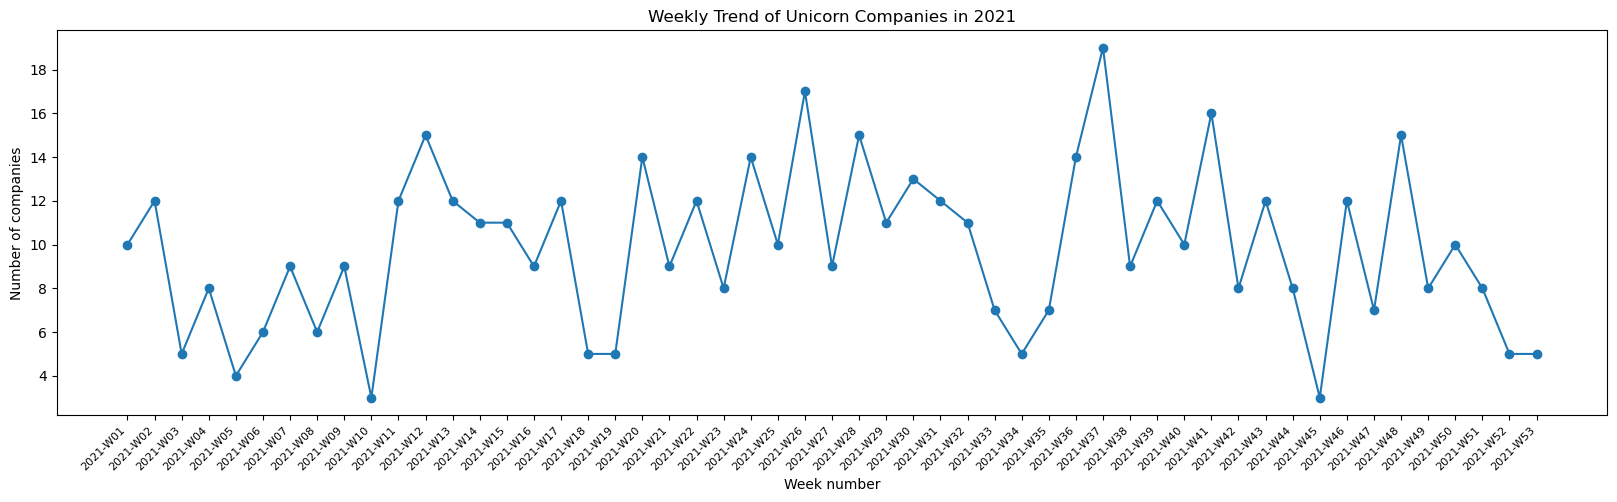

In [62]:
# Set the size of the plot
plt.figure(figsize=(20, 5))

# Line plot to show weekly unicorn formation trend
plt.plot(companies_by_week_2021['Week Joined'],
         companies_by_week_2021['Company Count'],
         marker='o')  # marker improves readability

# Labels & title
plt.xlabel("Week number")
plt.ylabel("Number of companies")
plt.title("Weekly Trend of Unicorn Companies in 2021")

# Rotate week labels to avoid overlap
plt.xticks(rotation=45, horizontalalignment='right', fontsize=8)

# Display the plot
plt.show()


**Question:** How would you structure the data to observe trends in the average valuation of companies from 2020 to 2021?  

- One approach consists of the following:
  - Choose a time interval over which you want to observe average valuation.
  - Create a subset of data that corresponds to the additional year. Concatenate that subset with the previous subset you created, in order to get the data for both years in one DataFrame. 
  - Create a column that contains the time interval that each data point belongs to (as needed), group by that column, and compute the average funding of companies that joined per interval. 
- To compare trends in average valuation of companies quarterly between 2021 and 2020, if you already had a subset for 2021, you could do the following: 
- Create a subset for 2020.
- Concatenate that with the subset for 2020.
- Create a column that corresponds to quarter joined.
- Group by quarter.
- Compute the average valuation of companies that joined per quarter. 

This allows the observation of trends over the quarters of 2020 compared to 2021. 

### Compare trends over time

Implement the structuring approach that you have identified in order to compare trends over time in the average valuation of companies that became unicorns between your years of interest. Keep in mind the data type of the `Valuation` column and what the values in that column contain currently.

In [63]:
# After identifying the additional year and time interval of interest, proceed with the following:
# Step 1. Filter by the additional year to create a subset that consists of companies that joined in that year.
# Step 2. Concatenate that new subset with the subset that you defined previously.
# Step 3. As needed, add a column that contains the time interval that each data point belongs to, 
#         in the concatenated DataFrame.
# Step 4. Transform the `Valuation` column as needed.
# Step 5. Group by the time interval.
#         Aggregate by computing average valuation of companies that joined per interval of the corresponding year.
#         Save the resulting DataFrame in a new variable.


# Filter by the additional year to create a subset that consists of companies that joined in that year.
companies_2020 = df[df["Date Joined"].dt.year == 2020]

# Concatenate the new subset with the subset that you defined previously.
companies_2020_2021 = pd.concat([companies_2020, companies_2021.drop(columns="Week Joined")])

# Add `Quarter Joined` column to `companies_2021`.
companies_2020_2021["Quarter Joined"] = companies_2020_2021["Date Joined"].dt.to_period('Q').dt.strftime('%Y-Q%q')

# Convert the `Valuation` column to numeric by removing `$` and `B` and casting each value to data type `float`.
companies_2020_2021["Valuation"] =  companies_2020_2021["Valuation"].str.strip("$B").astype(float)

# Group `companies_2020_2021` by `Quarter Joined`, 
# Aggregate by computing average `Funding` of companies that joined per quarter of each year.
# Save the resulting DataFrame in a new variable.
companies_by_quarter_2020_2021 = companies_2020_2021.groupby(by="Quarter Joined")["Valuation"].mean().reset_index().rename(columns={"Valuation":"Average Valuation"})

# Display the first few rows of the new DataFrame to confirm that it was created.
companies_by_quarter_2020_2021.head()

Quarter Joined  Average Valuation
0        2020-Q1           4.347826
1        2020-Q2           3.315789
2        2020-Q3           3.964286
3        2020-Q4           3.368421
4        2021-Q1           2.526316

**Question:** What do you observe from the bar plot of the number of companies that joined per interval for the year of 2021? When did the highest number of companies reach $1 billion valuation?

- Observations from a bar plot of the number of companies that became unicorns per week in 2021:

  - The number of companies that joined unicorn status fluctuated over the weeks of 2021, with a trend of decline followed by increase occurring periodically.
  - The highest number of companies reached $1 billion valuation in Week 37 of 2021, which corresponds to the third week of September 2021. 
  - The weeks in 2021 with the next highest number of companies becoming unicorns are Week 12 (which corresponds to the fourth week of March) and Week 28 (which corresponds to the third week of July). 
  

### Visualize the average valuation over the quarters

Using the subset of companies that joined in the years of interest, create a grouped bar plot to visualize the average valuation over the quarters, with two bars for each time interval. There will be two bars for each time interval. This allows you to compare quarterly values between the two years.

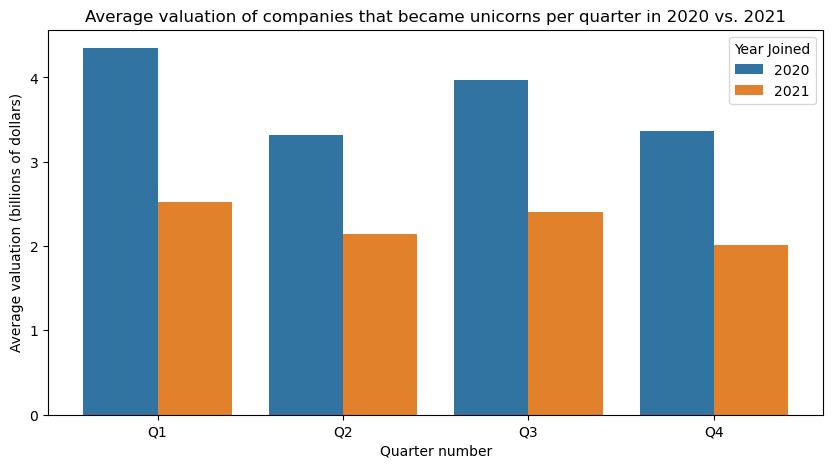

In [64]:
# Using slicing, extract the year component and the time interval that you specified, 
# and save them by adding two new columns into the subset.
companies_by_quarter_2020_2021['Quarter Number'] = companies_by_quarter_2020_2021['Quarter Joined'].str[-2:]
companies_by_quarter_2020_2021['Year Joined'] = companies_by_quarter_2020_2021['Quarter Joined'].str[:4]

# Set the size of the plot.
plt.figure(figsize = (10, 5))

# Create a grouped bar plot.
sns.barplot(x=companies_by_quarter_2020_2021['Quarter Number'],
            y=companies_by_quarter_2020_2021['Average Valuation'],
            hue=companies_by_quarter_2020_2021['Year Joined'])
plt.plot()

# Set the x-axis label.
plt.xlabel("Quarter number")

# Set the y-axis label.
plt.ylabel("Average valuation (billions of dollars)")

# Set the title.
plt.title("Average valuation of companies that became unicorns per quarter in 2020 vs. 2021")

# Display the plot.
plt.show()

**Question:** What do you observe from the preceding grouped bar plot?

- Observations from a grouped bar plot of average valuation of companies that became unicorns per quarter in 2020 vs. 2021:

  - In each quarter, the average valuation of companies that joined unicorn status was higher in 2020 than in 2021. 
  - In 2020, Q3 was the quarter with the highest average valuation of companies that reached unicorn status, and there was a trend of increase from Q1 to Q2 and from Q2 to Q3. 
  - In 2021, Q1 was the quarter with the highest average valuation of companies that reached unicorn status, and there was a trend of decrease across the quarters.
  

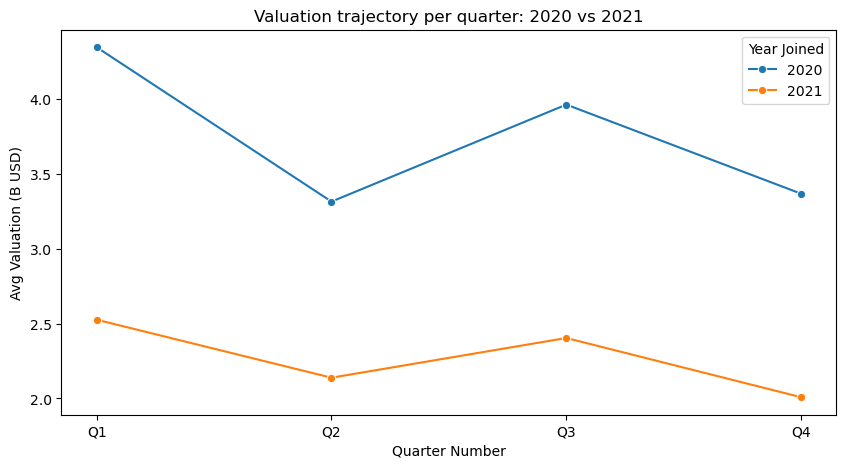

In [65]:
plt.figure(figsize=(10,5))
sns.lineplot(data=companies_by_quarter_2020_2021,
             x='Quarter Number',
             y='Average Valuation',
             hue='Year Joined',
             marker='o')
plt.xlabel("Quarter Number")
plt.ylabel("Avg Valuation (B USD)")
plt.title("Valuation trajectory per quarter: 2020 vs 2021")
plt.show()


### Plot maps

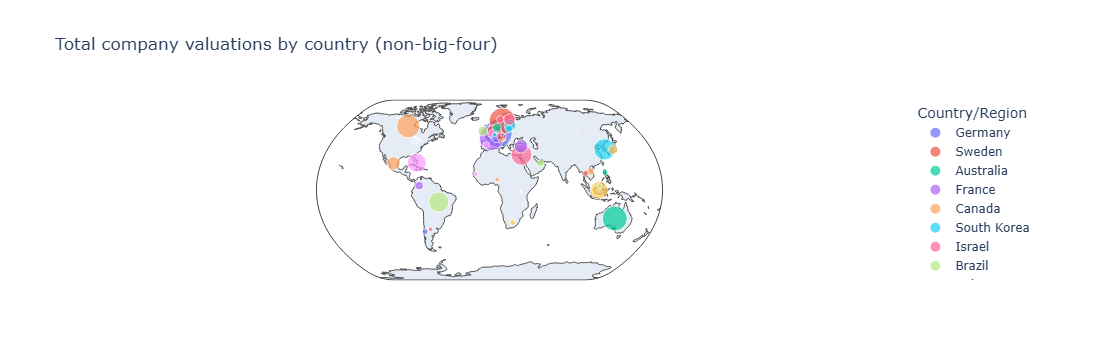

In [66]:
# Plot the sum of valuations per country.
import plotly.express as px
data = national_valuations_no_big4

px.scatter_geo(data, 
               locations='Country/Region', 
               size='valuation_num', 
               locationmode='country names', 
               color='Country/Region',
               title='Total company valuations by country (non-big-four)',
               projection='natural earth')

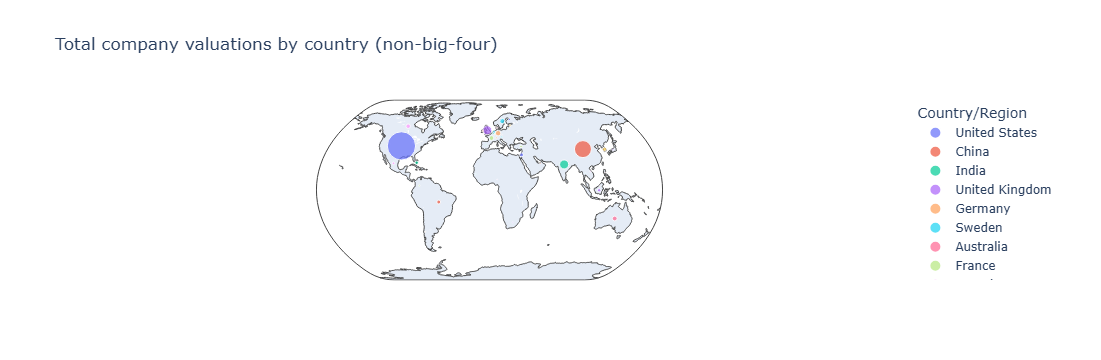

In [67]:
# Plot the sum of valuations per country.
data = national_valuations

px.scatter_geo(data, 
               locations='Country/Region', 
               size='valuation_num', 
               locationmode='country names', 
               color='Country/Region',
               title='Total company valuations by country (non-big-four)',
               projection='natural earth')